In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix


In [6]:
data = pd.read_excel('TESTING NB15.xlsx')

In [7]:
# Display the first few rows of the dataset
print(data.head())

   id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1             0           0   
1  ...                 1               2             0           0   
2  ...                 1               3             0           0   
3  ...                 1               3             1           1   
4  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0   

In [8]:
# Check the dimensions of the dataset
print(data.shape)

(175341, 45)


In [9]:
# Check the data types of the columns
print(data.dtypes)

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [10]:
# Check for missing values
print(data.isnull().sum())

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [11]:
# Check the distribution of the target variable
print(data['label'].value_counts())

1    119341
0     56000
Name: label, dtype: int64


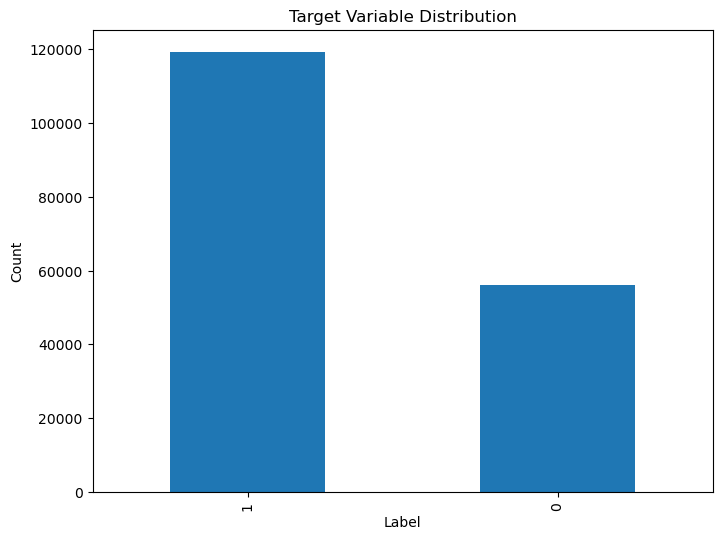

In [14]:
# Visualize the target variable distribution
plt.figure(figsize=(8, 6))
data['label'].value_counts().plot(kind='bar')
plt.title('Target Variable Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [17]:
# Drop irrelevant columns
#data.drop(['column_name1', 'column_name2', ...], axis=1, inplace=True)

# Handle missing values if any
#data.dropna(inplace=True)


In [20]:
columns_to_drop = [
    'proto',           # Protocol
    'state',           # Connection state
    'service',         # Service
    'ct_dst_src_ltm',  # Count of connections with the same (src IP, dst IP)
    'ct_srv_dst',      # Count of connections with the same (service, dst IP)
    'ct_dst_sport_ltm' # Count of connections with the same (dst IP, dst port)
]

data.drop(columns_to_drop, axis=1, inplace=True)



In [21]:
# Handle missing values if any
data.dropna(inplace=True)


In [23]:
# Split the data into features and target variable
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [25]:
# Apply feature scaling to standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: could not convert string to float: 'Normal'

In [26]:
# Identify the categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

In [27]:
print(categorical_columns)

['attack_cat']


In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer



# Identify the categorical columns in your dataset
categorical_columns = ['attack_cat']  # Add the column names

# Perform label encoding for each categorical column
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Perform one-hot encoding for the categorical columns
column_transformer = ColumnTransformer([('encoder', OneHotEncoder(), categorical_columns)],
                                       remainder='passthrough')
data_encoded = column_transformer.fit_transform(data)

# Apply feature scaling to the encoded dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)


In [32]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Drop the 'label' column
X = data.drop('label', axis=1)
y = data['label']

# Identify the categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Perform label encoding for each categorical column
label_encoder = LabelEncoder()
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])

# Apply feature scaling to standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature scaling to standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [35]:
# Initialize the Isolation Forest model
model = IsolationForest(random_state=42)

# Train the model
model.fit(X_train)

# Predict anomalies on the training and testing data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Convert anomaly predictions to binary values (0: normal, 1: anomaly)
y_pred_train = np.where(y_pred_train == -1, 1, 0)
y_pred_test = np.where(y_pred_test == -1, 1, 0)


In [36]:
# Evaluate the model performance
print("Training Set Performance:")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print("Testing Set Performance:")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))


Training Set Performance:
[[42631  2200]
 [92502  2939]]
              precision    recall  f1-score   support

           0       0.32      0.95      0.47     44831
           1       0.57      0.03      0.06     95441

    accuracy                           0.32    140272
   macro avg       0.44      0.49      0.27    140272
weighted avg       0.49      0.32      0.19    140272

Testing Set Performance:
[[10631   538]
 [23150   750]]
              precision    recall  f1-score   support

           0       0.31      0.95      0.47     11169
           1       0.58      0.03      0.06     23900

    accuracy                           0.32     35069
   macro avg       0.45      0.49      0.27     35069
weighted avg       0.50      0.32      0.19     35069



In [37]:
pip install flask

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [ ]:
from flask import Flask, render_template, request
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

app = Flask(__name__)

# Load the trained model
model = IsolationForest(random_state=42)

# Load the scaler for feature scaling
scaler = StandardScaler()

# Load the dataset for scaling
data = pd.read_excel('TESTING NB15.xlsx')


X = data.drop('label', axis=1)
X = scaler.fit_transform(X)

# Train the model on the entire preprocessed dataset
model.fit(X)

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    # Retrieve the feature values from the request form
    feature_values = request.form.values()

    # Convert the feature values to a numpy array and scale them
    features = np.array(list(feature_values)).reshape(1, -1)
    features_scaled = scaler.transform(features)

    # Predict if the input is an anomaly
    prediction = model.predict(features_scaled)

    # Convert the prediction to binary value (0: normal, 1: anomaly)
    prediction = np.where(prediction == -1, 1, 0)

    if prediction == 0:
        result = "Normal"
    else:
        result = "Anomaly"

    return render_template('index.html', result=result)

if __name__ == '__main__':
    app.run(debug=True)
